In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
sale_counts_file = "Sale_Counts_Reformatted_3Year.csv"
sale_prices_file = "Median_Sale_Prices_Reformatted_3Year.csv"

In [3]:
counts_df = pd.read_csv(sale_counts_file)
prices_df = pd.read_csv(sale_prices_file)

In [4]:
merged_df = pd.merge(counts_df, prices_df, on=['RegionID','Year'], how='inner', suffixes = ('_count', '_price'))
merged_df.head()

,RegionID,RegionName_count,StateCode_count,Year,Counts,RegionName_price,StateCode_price,Price
0,394865,"Minneapolis-St Paul, MN",MN,2017,69093,"Minneapolis-St Paul, MN",MN,233492
1,394543,"Duluth, MN",MN,2017,4925,"Duluth, MN",MN,139300
2,395030,"Rochester, MN",MN,2017,4282,"Rochester, MN",MN,182558
3,395118,"St. Cloud, MN",MN,2017,3302,"St. Cloud, MN",MN,164475
4,394823,"Mankato, MN",MN,2017,1554,"Mankato, MN",MN,171142


In [6]:
merged_df.replace(to_replace=0, value='NaN', regex=True)
merged_df.dropna(how='any')
del merged_df['RegionName_price']
del merged_df['StateCode_price']
cleaned_df = merged_df.rename(columns={'RegionName_count':'RegionName','StateCode_count':'StateCode'})
cleaned_df.head()

,RegionID,RegionName,StateCode,Year,Counts,Price
0,394865,"Minneapolis-St Paul, MN",MN,2017,69093,233492
1,394543,"Duluth, MN",MN,2017,4925,139300
2,395030,"Rochester, MN",MN,2017,4282,182558
3,395118,"St. Cloud, MN",MN,2017,3302,164475
4,394823,"Mankato, MN",MN,2017,1554,171142


In [7]:
# Separating MN and US numbers
MN_df = cleaned_df.loc[(cleaned_df['StateCode'] == 'MN'),['Counts', 'Price']]
US_df = cleaned_df.loc[(cleaned_df['StateCode'] == 'US'),['Counts', 'Price']]

The correlation between sale price and number of homes sold is 0.56.


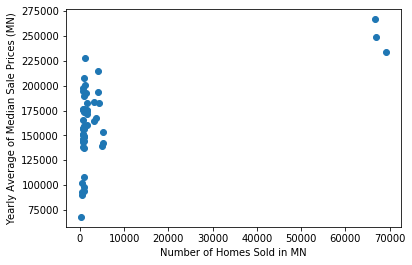

In [9]:
x_values = MN_df['Counts']
y_values = MN_df['Price']
plt.scatter(x_values, y_values)
plt.xlabel('Number of Homes Sold in MN')
plt.ylabel('Yearly Average of Median Sale Prices (MN)')
correlation = st.pearsonr(x_values, y_values)
print(f'The correlation between sale price and number of homes sold is {round(correlation[0],2)}.')
plt.show()

The r-squared is: 0.31637020636308594


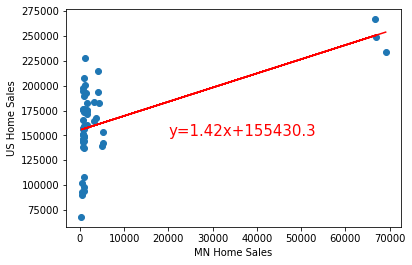

In [12]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" +str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20000,150000),fontsize=15,color='red')
plt.xlabel('MN Home Sales')
plt.ylabel('US Home Sales')
print(f'The r-squared is: {rvalue**2}')
plt.show()